## Android 14 기반 RRO(런타임 리소스 오버레이) 실습 예제

Android 14에서 런타임 리소스 오버레이(Runtime Resource Overlay, RRO)를 사용하여 앱의 리소스를 동적으로 변경하는 방법을 실습 예제를 통해 단계별로 안내합니다. 이 예제에서는 간단한 앱을 만들고, RRO를 통해 이 앱의 문자열과 색상 리소스를 변경해보겠습니다.

---

### 1단계: 실습 준비

먼저 Android 14(API 수준 34)를 지원하는 최신 버전의 Android 스튜디오를 준비해야 합니다.

---

### 2단계: 타겟 앱 만들기
RRO를 적용할 대상이 되는 간단한 앱을 만듭니다.

#### 1. 새 프로젝트 생성

- Android 스튜디오에서 File > New > New Project...를 선택합니다.

- Empty Views Activity 템플릿을 선택하고 Next를 클릭합니다.

- 애플리케이션 이름을 RROTarget으로, 패키지 이름을 com.example.rrotarget으로 지정합니다.

- Language : Java 선택

- Minimum SDK를 API 34: Android 14로 설정하고 Finish를 클릭합니다.

#### 2. 레이아웃 및 리소스 정의

Android 선택
- app/res/layout/activity_main.xml 파일을 열고 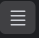 선택 후 TextView의 ID를 지정하고 텍스트를 설정합니다.

``` xml
<?xml version="1.0" encoding="utf-8"?>
<androidx.constraintlayout.widget.ConstraintLayout xmlns:android="http://schemas.android.com/apk/res/android"
    xmlns:app="http://schemas.android.com/apk/res-auto"
    xmlns:tools="http://schemas.android.com/tools"
    android:id="@+id/main"
    android:layout_width="match_parent"
    android:layout_height="match_parent"
    tools:context=".MainActivity">

    <TextView
        android:id="@+id/hello_text"
        android:layout_width="wrap_content"
        android:layout_height="wrap_content"
        android:text="@string/hello_world"
        app:layout_constraintBottom_toBottomOf="parent"
        app:layout_constraintEnd_toEndOf="parent"
        app:layout_constraintStart_toStartOf="parent"
        app:layout_constraintTop_toTopOf="parent" />

</androidx.constraintlayout.widget.ConstraintLayout>

```

- app/res/values/strings.xml 파일에 문자열 리소스를 정의합니다.

```xml
<resources>
    <string name="app_name">RROTarget</string>
    <string name="hello_world">how are you</string>
</resources>
```

- app/res/values/colors.xml 파일에 색상 리소스를 정의합니다.

```xml
<?xml version="1.0" encoding="utf-8"?>
<resources>
    <color name="black">#FF000000</color>
    <color name="white">#FFFFFFFF</color>
    <color name="background_color">#FFFFFF</color>
    <color name="text_color">#000000</color>
</resources>
```

#### 3. 오버레이 가능한 리소스 지정 (중요)

- RRO가 리소스를 변경하기 위해서는 타겟 앱에서 해당 리소스가 오버레이 가능하다고 명시해야 합니다.

- app/res/values/ 디렉터리에 overlayable.xml 파일을 새로 만듭니다.

```xml
<?xml version="1.0" encoding="utf-8"?>
<resources>
    <overlayable name="RROTargetTheme">
        <policy type="public">
            <item type="string" name="hello_world" />
        </policy>
    </overlayable>
</resources>
```

- <overlayable> 태그의 name은 오버레이를 식별하는 데 사용됩니다.

- <policy type="public">: RRO가 접근할 수 있도록 공개 정책을 설정합니다.

- <item>: 오버레이를 허용할 리소스의 type(종류)과 name(이름)을 지정합니다.


#### 4. 타겟 앱 빌드
- Android 스튜디오에서 Build > Generate App Bundles or APKs / Generate APKs를 선택하여 RROTarget 패키지의 APK 파일을 생성합니다.

---

### 3단계: RRO 패키지 만들기
이제 타겟 앱의 리소스를 덮어쓸 RRO 패키지를 만듭니다.

#### 1. 새 프로젝트 생성

- Android 스튜디오에서 File > New > New Project...를 선택합니다.

- Empty Views Activity 템플릿을 선택하고 Next를 클릭합니다.

- 애플리케이션 이름을 RROTarget으로, 패키지 이름을 com.example.rrooverlay으로 지정합니다.

- Language : Java 선택

- Minimum SDK를 API 34: Android 14로 설정하고 Finish를 클릭합니다.

#### 2. AndroidManifest.xml 수정

RRO 패키지는 자바 코드가 필요 없으며, application 태그 내에 <overlay> 태그를 추가하는 것이 핵심입니다.

Android 선택
app/manifests/AndroidManifest.xml 파일을 다음과 같이 수정합니다.

```xml
<?xml version="1.0" encoding="utf-8"?>
<manifest xmlns:android="http://schemas.android.com/apk/res/android"
    package="com.example.rrooverlay">

    <application
        android:hasCode="false"
        android:label="RRO Overlay">
    </application>

    <overlay
        android:targetPackage="com.example.rrotarget"
        android:targetName="RROTargetTheme"
        android:priority="1"
        android:isStatic="false" />
</manifest>
```

- android:hasCode="false": 이 패키지에 실행 가능한 코드가 없음을 나타냅니다.

- <overlay>: 이 패키지가 RRO임을 명시합니다.

    - android:targetPackage: 오버레이할 타겟 앱의 패키지 이름(com.example.rrotarget)을 정확히 입력합니다.

    - android:targetName: 타겟 앱의 overlayable.xml에 정의한 <overlayable>의 name(RROTargetTheme)을 입력합니다.

    - android:isStatic="false": 런타임에 동적으로 활성화/비활성화할 수 있는 RRO임을 의미합니다.

#### 3. 변경할 리소스 정의

- RRO 패키지에서 타겟 앱의 리소스와 동일한 이름으로 새로운 값을 정의합니다.

- app/res/values/strings.xml 파일의 내용을 변경합니다.

```xml
<resources>
    <string name="app_name">RROOverlay</string>
    <string name="hello_world">Hello, RRO! 🚀</string>
</resources>
```

- app/res/values/colors.xml 파일의 내용을 변경합니다.

```xml
<?xml version="1.0" encoding="utf-8"?>
<resources>
    <color name="black">#FF000000</color>
    <color name="white">#FFFFFFFF</color>
    <color name="background_color">#FFFFFF</color>
    <color name="text_color">#000000</color>
</resources>
```

#### 4. RRO 패키지 빌드

- Android 스튜디오에서 Build > Generate App Bundles or APKs / Generate APKs를 선택하여 RROOverlay 패키지의 APK 파일을 생성합니다.

---

### 4단계: RRO 설치 및 활성화
이제 ADB(Android Debug Bridge)를 사용하여 RRO를 설치하고 활성화합니다.

#### 1. RROTarget APK 설치

생성된 APK 파일(app-debug.apk)의 경로를 확인합니다. (보통 AndroidStudioProjects\RROTarget\app\build\outputs\apk\debug 경로에 있습니다)

해당 디렉토리에 있는 app-debug.apk 파일을 작업 디렉토리의 rrotarget.apk 로 복사한다.

터미널이나 명령 프롬프트에서 다음 명령어로 APK를 설치합니다.

``` shell
adb install rrotarget.apk
```

#### 2. RROOverlay APK 설치

생성된 APK 파일(app-debug.apk)의 경로를 확인합니다. (보통 AndroidStudioProjects\RROOverlay\app\build\outputs\apk\debug 경로에 있습니다)

해당 디렉토리에 있는 app-debug.apk 파일을 작업 디렉토리의 rrooverlay.apk 로 복사한다.

터미널이나 명령 프롬프트에서 다음 명령어로 APK를 설치합니다.

``` shell
adb install rrooverlay.apk
```

#### 3. RRO 활성화

설치 후, RRO를 활성화해야 변경 사항이 적용됩니다.

``` shell
adb shell 접속 후
emulator_car64_x86_64:/ cmd overlay enable com.example.rrooverlay
```

#### 4. RRO 상태 모니터링

``` shell
emulator_car64_x86_64:/ cmd overlay list | grep com.example.rrooverlay
emulator_car64_x86_64:/ cmd overlay dump com.example.rrooverlay
```

#### 5. 변경 사항 확인

이제 RROTarget 앱을 다시 실행하거나, 이미 실행 중이었다면 앱을 재시작합니다.

문구가 "Hello, RRO! 🚀"로 변경된 것을 확인할 수 있습니다.

### 5단계: RRO 비활성화 및 제거
RRO를 비활성화하거나 시스템에서 제거할 수도 있습니다.

- RRO 비활성화:
``` shell
emulator_car64_x86_64:/ cmd overlay disable com.example.rrooverlay
```

- RRO 패키지 제거:
``` shell
emulator_car64_x86_64:/ exit
adb uninstall com.example.rrooverlay
```

---

## 드로어블(Drawable) 리소스를 오버레이하는 두 번째 실습 예제를 안내해 드리겠습니다.

이전 예제에서 만든 RROTarget 앱에 아이콘과 배경 이미지를 추가하고, 새로운 RRO 패키지를 통해 이 이미지들을 변경해보겠습니다.

---

### 1단계: 기존 RROTarget 앱 수정
먼저, 이전 예제에서 만들었던 RROTarget 앱의 코드를 수정하여 ImageView를 추가하고 배경을 색상 대신 드로어블로 설정합니다.

#### 1. 배경 드로어블 만들기

RROTarget 프로젝트의 app/res/drawable/ 디렉터리에 background_shape.xml 파일을 새로 만듭니다.

```xml
<?xml version="1.0" encoding="utf-8"?>
<shape xmlns:android="http://schemas.android.com/apk/res/android"
    android:shape="rectangle">
    <solid android:color="#E0E0E0" /> <corners android:radius="16dp" />
    <stroke android:width="4dp" android:color="#CCCCCC" />
</shape>
```

2. 레이아웃(activity_main.xml) 수정

ImageView를 추가하고, RelativeLayout의 배경을 방금 만든 드로어블로 변경합니다.

```xml
<?xml version="1.0" encoding="utf-8"?>
<RelativeLayout xmlns:android="http://schemas.android.com/apk/res/android"
    xmlns:tools="http://schemas.android.com/tools"
    android:id="@+id/main_layout"
    android:layout_width="match_parent"
    android:layout_height="match_parent"
    android:background="@drawable/background_shape" android:gravity="center"
    android:padding="32dp"
    tools:context=".MainActivity">

    <ImageView
        android:id="@+id/icon_view"
        android:layout_width="96dp"
        android:layout_height="96dp"
        android:layout_centerHorizontal="true"
        android:src="@drawable/ic_target_icon" />

    <TextView
        android:id="@+id/hello_text"
        android:layout_width="wrap_content"
        android:layout_height="wrap_content"
        android:layout_below="@id/icon_view"
        android:layout_centerHorizontal="true"
        android:layout_marginTop="24dp"
        android:text="@string/hello_world"
        android:textColor="@color/text_color"
        android:textSize="28sp" />

</RelativeLayout>
```

#### 3. 아이콘 추가

- File > New > Vector Asset을 선택하여 아이콘을 추가합니다.

- Clip Art에서 원하는 아이콘(예: android)을 선택합니다.

- 이름을 ic_target_icon으로 지정하고 Next, Finish를 클릭합니다. 이 파일은 app/res/drawable/에 생성됩니다.

#### 4. overlayable.xml 업데이트 (중요)

- 새로 추가한 드로어블 리소스들을 RRO가 덮어쓸 수 있도록 app/res/values/overlayable.xml 파일에 추가합니다.

```xml
<?xml version="1.0" encoding="utf-8"?>
<resources>
    <overlayable name="RROTargetTheme">
        <policy type="public">
            <item type="color" name="background_color" />
            <item type="color" name="text_color" />
            <item type="string" name="hello_world" />
            <item type="drawable" name="background_shape" />
            <item type="drawable" name="ic_target_icon" />
        </policy>
    </overlayable>
</resources>
```

#### 5. 타겟 앱 다시 빌드 및 설치

- Android 스튜디오에서 Build > Generate App Bundles or APKs / Generate APKs를 선택하여 RROTarget 패키지의 APK 파일을 생성합니다.

---

### 2단계: RROOverlay 패키지 수정
이제 아이콘과 배경 드로어블을 교체할 RROOverlay 패키지를 수정합니다.

#### 1. 교체할 드로어블 리소스 추가

- 타겟 앱의 리소스와 반드시 동일한 파일 이름을 사용해야 합니다.

- 새로운 배경 드로어블 만들기:

    - app/res/drawable/ 디렉터리에 background_shape.xml 파일을 만듭니다.

```xml
<?xml version="1.0" encoding="utf-8"?>
<shape xmlns:android="http://schemas.android.com/apk/res/android"
    android:shape="rectangle">
    <gradient
        android:angle="90"
        android:endColor="#673AB7"
        android:startColor="#B39DDB" />
    <corners android:radius="32dp" />
</shape>
```

- 새로운 아이콘 추가:

    - File > New > Vector Asset을 선택합니다.

    - 다른 아이콘(예: rocket_launch)을 선택하고, 파일 이름을 ic_target_icon으로 정확하게 지정합니다.

#### 4. RRO 패키지 빌드

- BAndroid 스튜디오에서 Build > Generate App Bundles or APKs / Generate APKs를 선택하여 RROOverlay 패키지의 APK 파일을 생성합니다.

### 이후 테스트 과정의 적용인 이전 방식과 동일합니다.